**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [2]:
### get annotated region folder
txt_fdiry = file.path(FD_RES, "region_annotation")
vec = dir(txt_fdiry)
names(vec) = vec

### assign and show
vec_txt_folder = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
lst = lapply(vec_txt_folder, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.fcc_starrmpra_junke.group.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_folder

### assign and show
lst_dat_region_annot_fcc_starrmpra = lst
res = lapply(lst, dim)
print(res)
dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 109394     10

$fcc_astarr_macs_input_union
[1] 146148     10



Chrom,ChromStart,ChromEnd,Region,Direction_Assay,Num_Assay,TSS,Distance2TSS,TSS_Proximity,Group
chr1,115429,115969,chr1:115429-115969,Active,1,0,86059,Distal,Distal:Active
chr1,184091,184563,chr1:184091-184563,Active,1,0,154721,Distal,Distal:Active
chr1,605104,605675,chr1:605104-605675,Active,1,0,221848,Distal,Distal:Active


In [4]:
lst = lst_dat_region_annot_fcc_starrmpra
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Num_Assay > 1)
    return(dat)
})

lst_dat_region_annot_result = lst

In [21]:
lst = lst_dat_region_annot_result 
dat = lst[[1]]
dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()

dat = as.data.frame(table(dat$Group))
colnames(dat) = c("Group", "Count")

dat %>% kableExtra::kable("markdown")



|Group               | Count|
|:-------------------|-----:|
|Distal:Active       | 11435|
|Distal:Repressive   |  1613|
|Proximal:Active     |  5162|
|Proximal:Repressive |   136|

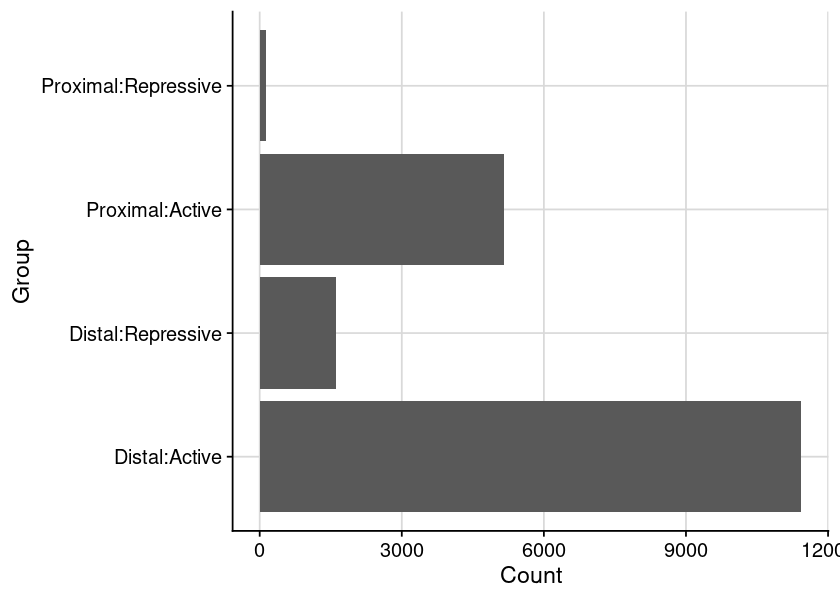

In [11]:
lst = lst_dat_region_annot_result 
dat = lst[[1]]
dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()

dat = as.data.frame(table(dat$Group))
colnames(dat) = c("Group", "Count")

gpt = ggplot(dat, aes(x=Count, y = Group)) + 
    geom_col() +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 5, repr.plot.width = 7)
print(gpt)

In [12]:
library(UpSetR)

In [20]:
lst = lst_dat_region_annot_result 
dat = lst[[1]]
vec = unique(dat$Region)
length(vec)

[1] 18341

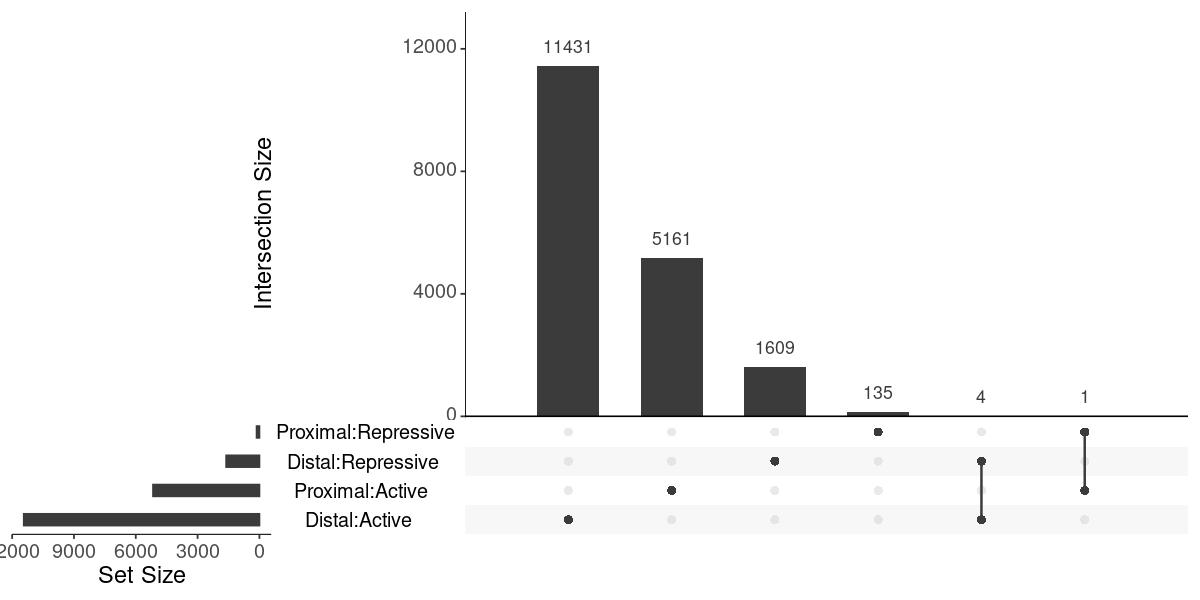

In [19]:
lst = lst_dat_region_annot_result 
dat = lst[[1]]
dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()
lst = split(dat$Region, dat$Group)

options(repr.plot.height=5, repr.plot.width=10)
upset(fromList(lst), order.by = "freq", text.scale=1.7)